In [1]:
!ls

_1.tfrecord.gz	      gribRead.py     Precipitation_Map.ipynb
docker-compose.yaml   gribRead_V2.py  prepMap_1.tfrecord.gz
Dockerfile	      gribRead_V3.py  prepMaptest2_1.tfrecord.gz
file.grib2	      jovyan	      requirements.txt
file.grib2.90c91.idx  ncepgrib2.py    test.ipynb
file.grib2.923a8.idx  netcdf_file.nc  UserTable_MRMS_v12.1.csv


In [2]:
#wget ftp://ftp.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.2019050806/gfs.t06z.pgrb2.0p25.f000
#https://stackoverflow.com/questions/68938395/python-decoding-ndfd-grib-binary-file-similar-to-writing-then-reading-the-file-u
import gzip
import shutil 
import numpy as np
import gzip
import shutil 
file_content =''
#with gzip.open('./MRMS_RadarOnly_QPE_24H_00.00_20220107-230000.grib2.gz', 'rb') as f_in:
#  with open('./file.grib2', 'wb') as f_out:
#    shutil.copyfileobj(f_in, f_out)


FileNotFoundError: [Errno 2] No such file or directory: './MRMS_RadarOnly_QPE_24H_00.00_20220107-230000.grib2.gz'

In [3]:
%matplotlib inline
import xarray as xr

ds = xr.open_dataset("./file.grib2",  engine="cfgrib" )
ds

Ignoring index file './file.grib2.923a8.idx' older than GRIB file


<xarray.Dataset>
Dimensions:         (latitude: 3500, longitude: 7000)
Coordinates:
    time            datetime64[ns] ...
    step            timedelta64[ns] ...
    heightAboveSea  float64 ...
  * latitude        (latitude) float64 54.99 54.98 54.98 ... 20.03 20.02 20.01
  * longitude       (longitude) float64 230.0 230.0 230.0 ... 300.0 300.0 300.0
    valid_time      datetime64[ns] ...
Data variables:
    unknown         (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             161
    GRIB_centreDescription:  161
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             161
    history:                 2022-02-21T19:38 GRIB to CDM+CF via cfgrib-0.9.1...

In [4]:
#conda install -c conda-forge iris
ds.to_netcdf('netcdf_file.nc')
#iris.save(cubes[0],'input.nc')  # save a specific variable to grib 

In [5]:
!ls
ds

_1.tfrecord.gz	      gribRead.py     Precipitation_Map.ipynb
docker-compose.yaml   gribRead_V2.py  prepMap_1.tfrecord.gz
Dockerfile	      gribRead_V3.py  prepMaptest2_1.tfrecord.gz
file.grib2	      jovyan	      requirements.txt
file.grib2.90c91.idx  ncepgrib2.py    test.ipynb
file.grib2.923a8.idx  netcdf_file.nc  UserTable_MRMS_v12.1.csv


<xarray.Dataset>
Dimensions:         (latitude: 3500, longitude: 7000)
Coordinates:
    time            datetime64[ns] 2022-01-07T23:00:00
    step            timedelta64[ns] 00:00:00
    heightAboveSea  float64 0.0
  * latitude        (latitude) float64 54.99 54.98 54.98 ... 20.03 20.02 20.01
  * longitude       (longitude) float64 230.0 230.0 230.0 ... 300.0 300.0 300.0
    valid_time      datetime64[ns] 2022-01-07T23:00:00
Data variables:
    unknown         (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             161
    GRIB_centreDescription:  161
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             161
    history:                 2022-02-21T19:38 GRIB to CDM+CF via cfgrib-0.9.1...

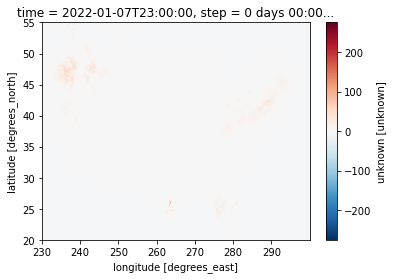

In [6]:
%matplotlib inline
ds.unknown.plot()

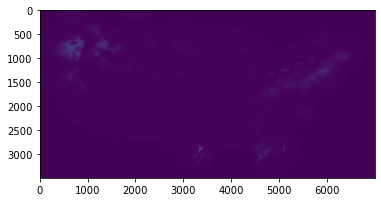

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(ds.unknown.data)

In [8]:
from metpy.units import masked_array, units
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [9]:
fn = './netcdf_file.nc'
#ds = nc.Dataset(fn)
nc = Dataset(fn)
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    GRIB_edition: 2
    GRIB_centre: 161
    GRIB_centreDescription: 161
    GRIB_subCentre: 0
    Conventions: CF-1.7
    institution: 161
    history: 2022-02-21T19:38 GRIB to CDM+CF via cfgrib-0.9.10.0/ecCodes-2.24.2 with {"source": "file.grib2", "filter_by_keys": {}, "encode_cf": ["parameter", "time", "geography", "vertical"]}
    dimensions(sizes): latitude(3500), longitude(7000)
    variables(dimensions): int64 time(), float64 step(), float64 heightAboveSea(), float64 latitude(latitude), float64 longitude(longitude), float64 valid_time(), float32 unknown(latitude, longitude)
    groups: 

In [10]:
nc.variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 int64 time()
     long_name: initial time of forecast
     standard_name: forecast_reference_time
     units: seconds since 1970-01-01
     calendar: proleptic_gregorian
 unlimited dimensions: 
 current shape = ()
 filling on, default _FillValue of -9223372036854775806 used,
 'step': <class 'netCDF4._netCDF4.Variable'>
 float64 step()
     _FillValue: nan
     long_name: time since forecast_reference_time
     standard_name: forecast_period
     units: hours
 unlimited dimensions: 
 current shape = ()
 filling on,
 'heightAboveSea': <class 'netCDF4._netCDF4.Variable'>
 float64 heightAboveSea()
     _FillValue: nan
     long_name: original GRIB coordinate for key: level(heightAboveSea)
     units: 1
 unlimited dimensions: 
 current shape = ()
 filling on,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float64 latitude(latitude)
     _FillValue: nan
     units: degrees_north
     standard_name: latitude
     long_name: latitude
     stored

In [11]:
ds.unknown

<xarray.DataArray 'unknown' (latitude: 3500, longitude: 7000)>
array([[-3., -3., -3., ..., -3., -3., -3.],
       [-3., -3., -3., ..., -3., -3., -3.],
       [-3., -3., -3., ..., -3., -3., -3.],
       ...,
       [-3., -3., -3., ..., -3., -3., -3.],
       [-3., -3., -3., ..., -3., -3., -3.],
       [-3., -3., -3., ..., -3., -3., -3.]], dtype=float32)
Coordinates:
    time            datetime64[ns] 2022-01-07T23:00:00
    step            timedelta64[ns] 00:00:00
    heightAboveSea  float64 0.0
  * latitude        (latitude) float64 54.99 54.98 54.98 ... 20.03 20.02 20.01
  * longitude       (longitude) float64 230.0 230.0 230.0 ... 300.0 300.0 300.0
    valid_time      datetime64[ns] 2022-01-07T23:00:00
Attributes:
    GRIB_paramId:                             0
    GRIB_dataType:                            ra
    GRIB_numberOfPoints:                      24500000
    GRIB_typeOfLevel:                         heightAboveSea
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_ll
    GRIB_NV:                                  0
    GRIB_Nx:                                  7000
    GRIB_Ny:                                  3500
    GRIB_cfName:                              unknown
    GRIB_cfVarName:                           unknown
    GRIB_gridDefinitionDescription:           Latitude/longitude 
    GRIB_iDirectionIncrementInDegrees:        0.01
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        0.01
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   54.995
    GRIB_latitudeOfLastGridPointInDegrees:    20.005001
    GRIB_longitudeOfFirstGridPointInDegrees:  230.005
    GRIB_longitudeOfLastGridPointInDegrees:   299.994998
    GRIB_missingValue:                        9999
    GRIB_name:                                unknown
    GRIB_shortName:                           unknown
    GRIB_units:                               unknown
    long_name:                                unknown
    units:                                    unknown
    standard_name:                            unknown

In [12]:
import tensorflow as tf
import numpy as np

def serialize_array( array):
    array = tf.io.serialize_tensor(array)
    return array

def bytes_feature( value):
        """Returns a bytes_list from a string / byte."""
        if isinstance(value, type(tf.constant(0))): # if value ist tensor
            value = value.numpy() # get value of tensor
        return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def int64_feature( value):
        """Returns an int64_list from a bool / enum / int / uint."""
        return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))
    
def float_feature( value):
        """Returns a float_list from a float / double."""
        return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))
    
def create_tfrecord( example, metadata):
    #ds.unknown
    #lons =
    feature = {
        "radar": bytes_feature(serialize_array(example)), # tf.string
        "sample_prob": float_feature(1.),  # tf.float32
        "lonmin": int64_feature(int(metadata['GRIB_longitudeOfFirstGridPointInDegrees'])),#(metadata[0].latlong_box[0]), # tf.int64
        "lonmax": int64_feature(int(metadata['GRIB_longitudeOfLastGridPointInDegrees'])),#(metadata[0].latlong_box[1]), # tf.int64
        "latmin": int64_feature(int(metadata['GRIB_latitudeOfFirstGridPointInDegrees'])),#(metadata[0].latlong_box[2]), # tf.int64
        "latmax": int64_feature(int(metadata['GRIB_latitudeOfLastGridPointInDegrees']))#(metadata[0].latlong_box[3]), # tf.int64
        "end_time_timestamp": int64_feature(int(metadata[len(metadata) - 1].timestamp)), # tf.int64
    }
    return tf.train.Example(features=tf.train.Features(feature=feature))

def save_as_tfrecord( path, arr):
    # Convert arr (list of GoesImages) to tfrecord format
    # Concat all timesteps into one np array
    #radar_frames = np.empty((0,256,256,arr[0].num_bands))
    #for goes_image in arr:
    #    radar_frames = np.append(radar_frames, np.expand_dims(goes_image.img, axis=0), axis=0)
    #radar_frames = masked_array(prcpvar[:], units(prcpvar.units.lower())).to('mm')

    tfoptions = tf.io.TFRecordOptions(2) # 2 = GZIP
    with tf.io.TFRecordWriter(path + "_1.tfrecord.gz") as writer:
        tfrecord = create_tfrecord(arr.data, arr.attrs)
        serialized_tfrecord = tfrecord.SerializeToString()
        writer.write(serialized_tfrecord)

prcpvar = nc.variables['paramId_0']
prcpvar

In [13]:
#"lonmin": int64_feature(metadata[0].latlong_box[0]), # tf.int64
#"lonmax": int64_feature(metadata[0].latlong_box[1]), # tf.int64
#"latmin": int64_feature(metadata[0].latlong_box[2]), # tf.int64
#"latmax": int64_feature(metadata[0].latlong_box[3]), # tf.int64
#GRIB_latitudeOfFirstGridPointInDegrees 
#lats = np.linspace(float(ds.unknown['latitudeOfFirstGridPointInDegrees']), float(ds.unknown['latitudeOfLastGridPointInDegrees']), int(metadata['Nj']) )
#lats
#ds.unknown.attrs
#ds.unknown.attrs 
#lats = np.linspace(float(ds.unknown.attrs ['latitudeOfFirstGridPointInDegrees']), float(ds.unknown.attrs['latitudeOfLastGridPointInDegrees']), int(ds.unknown.attrs ['Nj']) )
ds.unknown.attrs['GRIB_longitudeOfFirstGridPointInDegrees']#.data#'GRIB_latitudeOfFirstGridPointInDegrees'


230.005

In [14]:
#"end_time_timestamp": int64_feature(int(metadata[len(metadata) - 1].timestamp)), # tf.int64


In [15]:
save_as_tfrecord( "./", ds.unknown)

2022-02-21 19:39:18.860106: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


!pip install --upgrade matplotlib
!pip install basemap-1.0.8-cp34-none-win_amd64.whl

import gzip
import shutil
import matplotlib.pyplot as plt
import numpy as np
import gzip
import shutil
import xarray as xr
# conda install -c conda-forge cfgrib
# conda install -c conda-forge pygrib=2.0.1

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import numpy as np

#pip install pygrib

#https://stackoverflow.com/questions/68938395/python-decoding-ndfd-grib-binary-file-similar-to-writing-then-reading-the-file-u
file_content =''
#with gzip.open('./RadarOnly_QPE_24H_00.00_20210101-000000.grib2.gz', 'rb') as f_in:
with gzip.open('./RadarOnly_QPE_24H_00.00_20210101-010000.grib2.gz', 'rb') as f_in:
  with open('./file.grib2', 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)

import pygrib
#pip install pyproj
# conda install -c conda-forge pygrib=2.0.1
gr = pygrib.open('./test/MRMS_RadarOnly_QPE_24H_00.00_20220107-230000.grib2')
print(gr)


grb = gr.select()[0]
print(grb)
data = grb.values
print(data) 


lons = np.linspace(float(grb['longitudeOfFirstGridPointInDegrees']), \
float(grb['longitudeOfLastGridPointInDegrees']), int(grb['Ni']) )
lats = np.linspace(float(grb['latitudeOfFirstGridPointInDegrees']), \
float(grb['latitudeOfLastGridPointInDegrees']), int(grb['Nj']) )
#data, lons = shiftgrid(180., data, lons, start=False)
print("post ")
print(data)
print(lons)
print('here')
print(grb['longitudeOfFirstGridPointInDegrees'])
print(grb['Nj'])

for g in gr:
    print (g)

#for g in gr:
#  print (g.typeOfLevel, g.level, g.name, g.validDate, g.analDate, g.forecastTime)
 

grid_lon, grid_lat = np.meshgrid(lons, lats) #regularly spaced 2D grid
 
m = Basemap(projection='cyl', llcrnrlon=-180, \
    urcrnrlon=180.,llcrnrlat=lats.min(),urcrnrlat=lats.max(), \
    resolution='c')
 
x, y = m(grid_lon, grid_lat)
 
cs = m.pcolormesh(x,y,data,shading='nearest',cmap=plt.cm.gist_stern_r)
 
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])
 
plt.colorbar(cs,orientation='vertical', shrink=0.5)
plt.title('CAMS AOD forecast') # Set the name of the variable to plot
plt.savefig( 'test.png') # Set the output file name


plt.show()
#plt.savefig( 'test.png') # Set the output file name
